## Predstavitev usmerjenih grafov pythonu

Adjacency Matrix: This is a 2D matrix where each element at position (i,j) is either 1 (if there is an edge from vertex i to vertex j) or 0 (if there is no such edge).

Adjacency List: This representation uses a list or array for each vertex to store its adjacent vertices. It's essentially a list of lists.

Edge List: This is a list of pairs (i,j) where there is an edge from vertex i to vertex j.

In [1]:
class DirectedGraph:
    def __init__(self, vertices):
        self.V = vertices
        self.adjacency_matrix = [[0 for _ in range(vertices)] for _ in range(vertices)]
        self.adjacency_list = [[] for _ in range(vertices)]
        self.edge_list = []

    def add_edge(self, src, dest):
        # For Adjacency Matrix
        self.adjacency_matrix[src][dest] = 1

        # For Adjacency List
        self.adjacency_list[src].append(dest)

        # For Edge List
        self.edge_list.append((src, dest))

    def display(self):
        print("Vertices:", self.V)
        
        print("\nAdjacency Matrix:")
        for i in range(self.V):
            for j in range(self.V):
                print(self.adjacency_matrix[i][j], end=" ")
            print()

        print("\nAdjacency List:")
        for i, lst in enumerate(self.adjacency_list):
            print(f"{i}:", lst)

        print("\nEdge List:", self.edge_list)
        
# Example usage
graph1 = DirectedGraph(5)
graph1.add_edge(0, 1)
graph1.add_edge(0, 3)
graph1.add_edge(1, 2)
graph1.add_edge(2, 1) # both directions
graph1.add_edge(2, 0)
graph1.add_edge(2, 3)
graph1.add_edge(3, 4)
graph1.add_edge(4, 2)
graph1.add_edge(4, 0)
graph1.display()


Vertices: 5

Adjacency Matrix:
0 1 0 1 0 
0 0 1 0 0 
1 1 0 1 0 
0 0 0 0 1 
1 0 1 0 0 

Adjacency List:
0: [1, 3]
1: [2]
2: [1, 0, 3]
3: [4]
4: [2, 0]

Edge List: [(0, 1), (0, 3), (1, 2), (2, 1), (2, 0), (2, 3), (3, 4), (4, 2), (4, 0)]


## Adjacency Matrix

Pros: Simple representation and easy to implement. Checking the existence of an edge between two vertices is O(1).

Cons: Space complexity is O(V^2), which can be wasteful for sparse graphs. Adding or removing a vertex is O(V^2) because you have to resize the matrix.

## Adjacency List

Pros: Space efficient for sparse graphs. Iterating over the neighbors of a vertex is efficient.

Cons: Checking the existence of an edge between two vertices can take up to O(V) in the worst case.

## Edge List

Pros: Simplest structure if you only care about the relationships and not necessarily about vertex-specific operations. Space efficient if the number of edges is small.

Cons: Not efficient for operations like checking the existence of an edge or finding all neighbors of a vertex. Most graph algorithms are not naturally expressed in terms of the edge list representation.

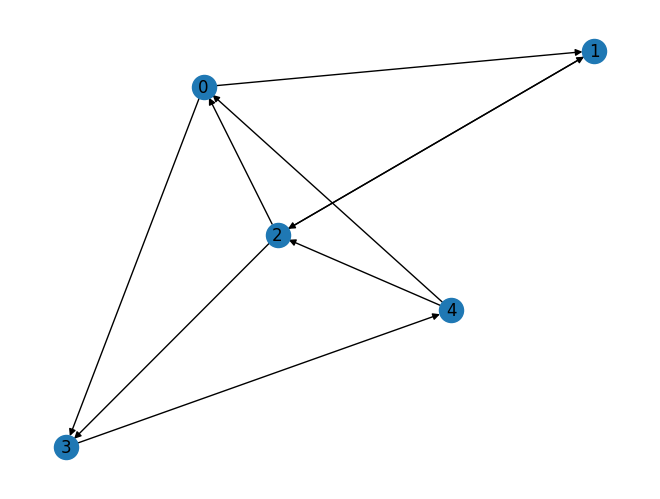

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_digraph(vertices, edge_list):
    G = nx.DiGraph()
    for i in range(vertices):
        G.add_node(i)
    
    # generate from graph1 
    for edge in edge_list:
        src = edge[0]
        dest = edge[1]
        
        if src != dest and not G.has_edge(src, dest):
            G.add_edge(src, dest)
        
    return G

def visualize_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, arrows=True)
    plt.show()
    
# Generate directed graph from graph1
G = generate_digraph(graph1.V, graph1.edge_list)

# Visualize it
visualize_graph(G)

In [3]:
from collections import deque

class DirectedGraph:
    def __init__(self, vertices):
        self.V = vertices
        self.adjacency_list = [[] for _ in range(vertices)]

    def add_edge(self, src, dest):
        # For Adjacency List
        self.adjacency_list[src].append(dest)

    def DFS(self, start_vertex):
        visited = [False] * self.V

        # Call the recursive DFS function
        self._DFS_util(start_vertex, visited)

    def _DFS_util(self, vertex, visited):
        # Mark the current vertex as visited
        visited[vertex] = True
        print(vertex, end=" ")

        # Recur for all adjacent vertices
        for i in self.adjacency_list[vertex]:
            if not visited[i]:
                self._DFS_util(i, visited)

    def BFS(self, start_vertex):
        visited = [False] * self.V
        queue = deque()

        visited[start_vertex] = True
        queue.append(start_vertex)

        while queue:
            vertex = queue.popleft()
            print(vertex, end=" ")

            # Get all adjacent vertices of the dequeued vertex
            for i in self.adjacency_list[vertex]:
                if not visited[i]:
                    visited[i] = True
                    queue.append(i)

# Example usage
g = DirectedGraph(5)
g.add_edge(0, 1)
g.add_edge(0, 3)
g.add_edge(1, 2)
g.add_edge(2, 1) # both directions
g.add_edge(2, 0)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(4, 2)
g.add_edge(4, 0)

print("Depth First Traversal starting from vertex 0:")
g.DFS(0)

print("\nDepth First Traversal starting from vertex 2:")
g.DFS(2)

print("\n\nBreadth First Traversal starting from vertex 0:")
g.BFS(0)

print("\nBreadth First Traversal starting from vertex 2:")
g.BFS(2)


Depth First Traversal starting from vertex 0:
0 1 2 3 4 
Depth First Traversal starting from vertex 2:
2 1 0 3 4 

Breadth First Traversal starting from vertex 0:
0 1 3 2 4 
Breadth First Traversal starting from vertex 2:
2 1 0 3 4 

In [4]:
class DirectedGraph:
    def __init__(self, vertices):
        self.V = vertices
        self.adjacency_list = [[] for _ in range(vertices)]

    def add_edge(self, src, dest):
        self.adjacency_list[src].append(dest)

    def DFS(self, start_vertex):
        visited = [False] * self.V

        # Call the recursive DFS function
        self._DFS_util(start_vertex, visited)

    def _DFS_util(self, vertex, visited):
        # Mark the current vertex as visited
        visited[vertex] = True
        print(vertex, end=" ")

        # Recur for all adjacent vertices
        for i in self.adjacency_list[vertex]:
            if not visited[i]:
                self._DFS_util(i, visited)

    def BFS(self, start_vertex):
        visited = [False] * self.V
        queue = deque()

        visited[start_vertex] = True
        queue.append(start_vertex)

        while queue:
            vertex = queue.popleft()
            print(vertex, end=" ")

            # Get all adjacent vertices of the dequeued vertex
            for i in self.adjacency_list[vertex]:
                if not visited[i]:
                    visited[i] = True
                    queue.append(i)

# Example usage
g = DirectedGraph(4)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 2)
g.add_edge(2, 0)
g.add_edge(2, 3)
g.add_edge(3, 3)



print("Breadth First Traversal starting from vertex 2:")
g.BFS(2)

print("\n\nDepth First Traversal starting from vertex 2:")
g.DFS(2)


Breadth First Traversal starting from vertex 2:
2 0 3 1 

Depth First Traversal starting from vertex 2:
2 0 1 3 

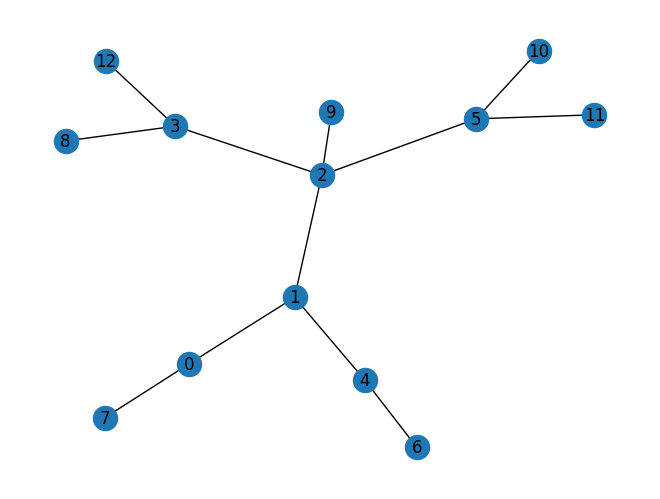

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_random_tree(nodes):
    G = nx.Graph()
    G.add_node(0)  # Add the first node
    
    for i in range(1, nodes):
        # Connect to a random existing node to ensure it's a tree
        connect_to = random.choice(list(G.nodes))
        G.add_edge(i, connect_to)
    
    return G

def visualize_tree(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()

# Generate random tree
T = generate_random_tree(13)

# Visualize it
visualize_tree(T)


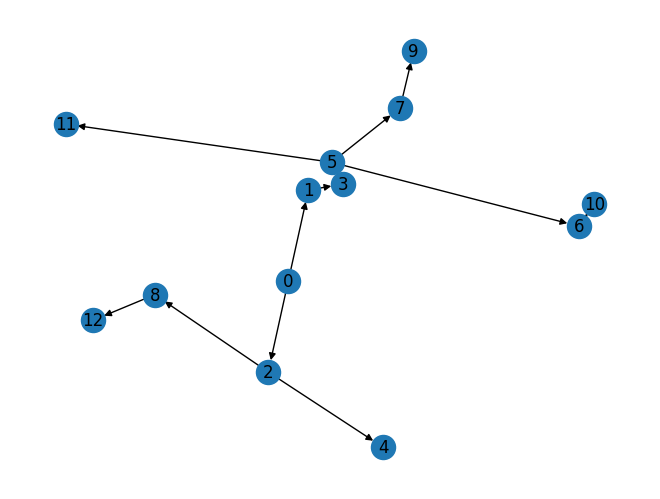

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_random_tree(nodes):
    G = nx.DiGraph()  # Directed graph since we'll be pointing from parent to child
    G.add_node(0)  # Add the first node
    
    for i in range(1, nodes):
        # Connect to a random existing node to ensure it's a tree
        connect_to = random.choice(list(G.nodes))
        G.add_edge(connect_to, i)  # Direction: Parent -> Child
    
    return G

def visualize_tree_topologically(G):
    # Get a topological sort of the nodes
    top_order = list(nx.topological_sort(G))
    
    # Assign each node a vertical layer based on its position in the topological order
    pos = {}
    for i, node in enumerate(top_order):
        pos[node] = (i, -i)
    
    nx.draw(G, pos, with_labels=True, arrows=True)
    plt.show()

# Generate random tree
T = generate_random_tree(13)

# Visualize it topologically
visualize_tree(T)


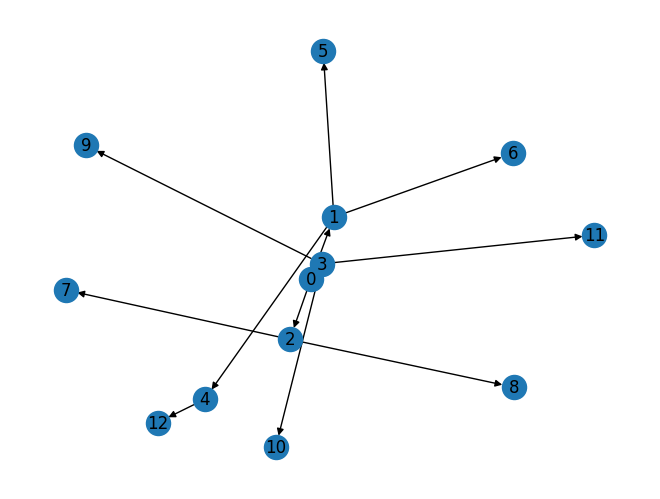

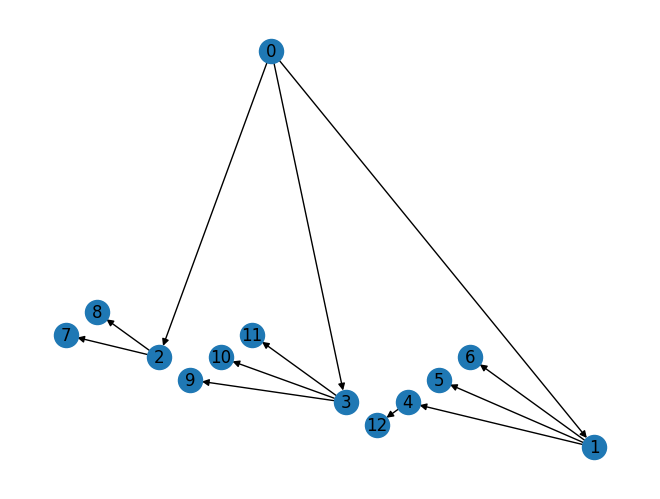

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_tree_with_2_or_3_children(nodes):
    G = nx.DiGraph()
    G.add_node(0)  # Start with a root node
    current_nodes = [0]
    next_node = 1

    while next_node < nodes:
        parent = current_nodes.pop(0)  # Get the next parent node

        # Decide whether the parent will have 2 or 3 children
        num_children = random.choice([2, 3])

        for _ in range(num_children):
            if next_node >= nodes:
                break
            G.add_edge(parent, next_node)
            current_nodes.append(next_node)
            next_node += 1

    return G

def visualize_tree_topologically(G):
    top_order = list(nx.topological_sort(G))
    pos = {}
    for i, node in enumerate(top_order):
        pos[node] = (i, -i)
    nx.draw(G, pos, with_labels=True, arrows=True)
    plt.show()

# Generate the tree
T = generate_tree_with_2_or_3_children(13)

# Visualize it topologically
visualize_tree(T)

def visualize_tree_from_top(G):
    pos = nx.planar_layout(G)
    
    # Ensure the root is at the top
    y_off = max(y for x, y in pos.values()) + 1
    pos[0] = (0, y_off)
    
    nx.draw(G, pos, with_labels=True, arrows=True)
    plt.show()

# Generate the tree
# T = generate_tree_with_2_or_3_children(13)

# Visualize it from top
visualize_tree_from_top(T)



## Minimum Spanning Tree (MST)

Let's implement and visualize the Minimum Spanning Tree (MST) using both Kruskal's and Prim's algorithms.

We'll use the networkx library to create and manage the graph, and matplotlib for visualization.

Here's a step-by-step implementation:

- Create a sample weighted graph.
- Implement Kruskal's algorithm to find the MST.
- Implement Prim's algorithm to find the MST.
- Visualize the original graph and the MSTs.

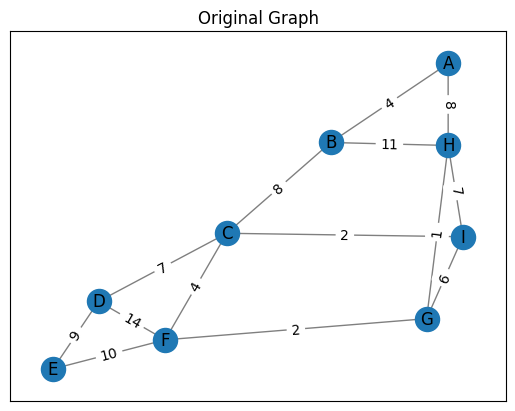

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample weighted graph
def create_sample_graph():
    G = nx.Graph()
    G.add_edge('A', 'B', weight=4)
    G.add_edge('A', 'H', weight=8)
    G.add_edge('B', 'C', weight=8)
    G.add_edge('B', 'H', weight=11)
    G.add_edge('C', 'D', weight=7)
    G.add_edge('C', 'F', weight=4)
    G.add_edge('C', 'I', weight=2)
    G.add_edge('D', 'E', weight=9)
    G.add_edge('D', 'F', weight=14)
    G.add_edge('E', 'F', weight=10)
    G.add_edge('F', 'G', weight=2)
    G.add_edge('G', 'H', weight=1)
    G.add_edge('G', 'I', weight=6)
    G.add_edge('H', 'I', weight=7)
    return G

# Kruskal's algorithm
def kruskal_mst(G):
    mst = nx.Graph()
    edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
    uf = nx.utils.union_find.UnionFind(G.nodes())
    
    for edge in edges:
        u, v, d = edge
        if uf[u] != uf[v]:
            mst.add_edge(u, v, weight=d['weight'])
            uf.union(u, v)
    return mst

# Prim's algorithm
import heapq

def prim_mst(G):
    mst = nx.Graph()
    start_node = list(G.nodes())[0]
    visited = {node: False for node in G.nodes()}
    edges = [(0, start_node, None)]  # (weight, node, previous_node)

    while edges:
        weight, node, prev_node = heapq.heappop(edges)
        if not visited[node]:
            visited[node] = True
            if prev_node is not None:  # Avoid adding None for the first node
                mst.add_edge(prev_node, node, weight=weight)

            for neighbor, attrs in G[node].items():
                if not visited[neighbor]:
                    heapq.heappush(edges, (attrs['weight'], neighbor, node))

    return mst

def compute_weight_of_mst(mst):
    return sum(data['weight'] for _, _, data in mst.edges(data=True))

# Visualization
def visualize_graph(G, title):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

G = create_sample_graph()
visualize_graph(G, "Original Graph")


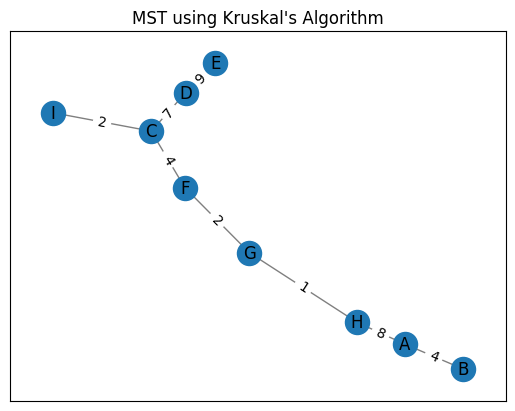

The weight of the Minimum Spanning Tree is: 37


In [9]:
mst_kruskal = kruskal_mst(G)
visualize_graph(mst_kruskal, "MST using Kruskal's Algorithm")
weight = compute_weight_of_mst(mst_kruskal)

print(f"The weight of the Minimum Spanning Tree is: {weight}")

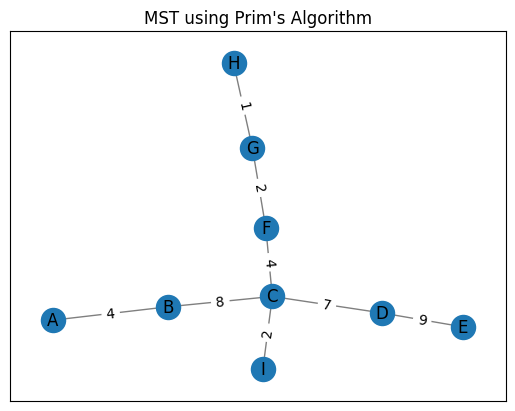

The weight of the Minimum Spanning Tree is: 37


In [10]:
mst_prim = prim_mst(G)
visualize_graph(mst_prim, "MST using Prim's Algorithm")
weight = compute_weight_of_mst(mst_prim)

print(f"The weight of the Minimum Spanning Tree is: {weight}")

## The shortest path in graph

1 Create a sample weighted graph.

2 Implement and visualize the search for the shortest path using:
- Dijkstra's algorithm
- Bellman-Ford algorithm
- Floyd-Warshall algorithm

3 Compute the length of the shortest path.

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def create_sample_graph():
    G = nx.DiGraph()
    G.add_edge('A', 'B', weight=4)
    G.add_edge('A', 'C', weight=2)
    G.add_edge('B', 'C', weight=5)
    G.add_edge('B', 'D', weight=10)
    G.add_edge('C', 'D', weight=3)
    G.add_edge('D', 'E', weight=8)
    G.add_edge('E', 'A', weight=7)
    return G


In [12]:
def dijkstra_shortest_path(G, source, target):
    return nx.dijkstra_path(G, source, target), nx.dijkstra_path_length(G, source, target)


In [13]:
def bellman_ford_shortest_path(G, source, target):
    length, path = nx.single_source_bellman_ford(G, source)
    return path[target], length[target]


In [14]:
def floyd_warshall_shortest_path(G, source, target):
    pred, dist = nx.floyd_warshall_predecessor_and_distance(G)
    path = [target]
    while target != source:
        target = pred[source][target]
        path.append(target)
    path.reverse()
    return path, dist[source][path[-1]]


In [15]:
def visualize_graph(G, path, title):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray')
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color='red', width=2)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()


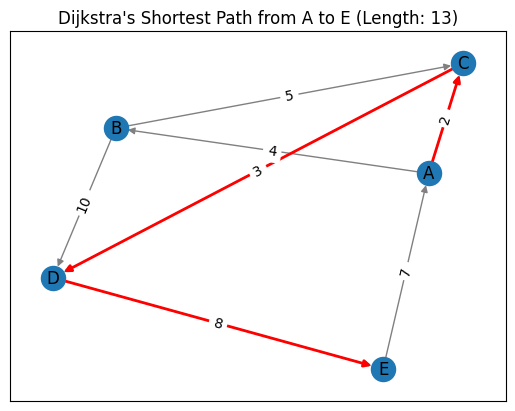

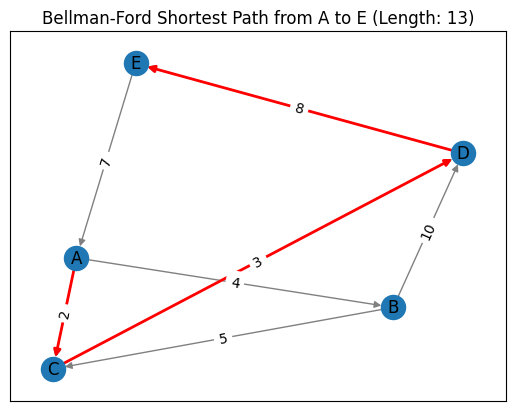

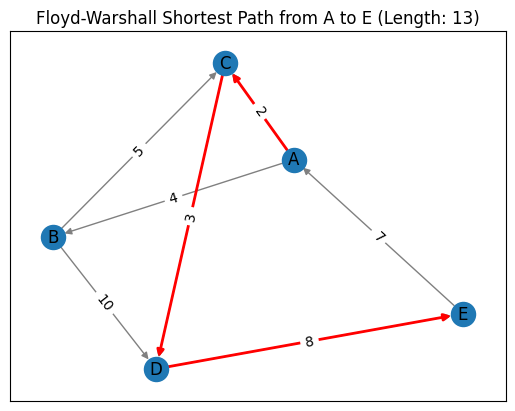

In [16]:
G = create_sample_graph()
source, target = 'A', 'E'

# Dijkstra's
path, length = dijkstra_shortest_path(G, source, target)
visualize_graph(G, path, f"Dijkstra's Shortest Path from {source} to {target} (Length: {length})")

# Bellman-Ford
path, length = bellman_ford_shortest_path(G, source, target)
visualize_graph(G, path, f"Bellman-Ford Shortest Path from {source} to {target} (Length: {length})")

# Floyd-Warshall
path, length = floyd_warshall_shortest_path(G, source, target)
visualize_graph(G, path, f"Floyd-Warshall Shortest Path from {source} to {target} (Length: {length})")


## Network Flow introduction

A flow network is a *directed graph* where each edge has a *capacity* and each edge receives a *flow*. The amount of flow on an edge cannot exceed the capacity of that edge. Often, such networks are used to represent the transfer of commodities between source and sink nodes under capacity constraints.

## Max Flow Problem

The maximum flow problem is a classical optimization problem where the objective is to find the maximum possible flow in a flow network from a source node to a sink node. The sum of flows into a node equals the sum of flows out of it for every node except for the source and sink nodes.

## Ford-Fulkerson Algorithm

The Ford-Fulkerson algorithm is an iterative method used to determine the maximum flow in a flow network. At each step, it tries to find a path from the source to the sink in the residual graph (a graph that shows capacities that are still unused) and sends flow along this path. The algorithm terminates when no such paths can be found in the residual graph.

The Ford-Fulkerson algorithm provides a way to optimize the flow through a network, ensuring that resources (or any other quantifiable entities) are efficiently distributed from a source to a sink, given certain constraints.

In [2]:
import collections

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0] * vertices for _ in range(vertices)]

    def add_edge(self, u, v, w):
        self.graph[u][v] = w

    def bfs(self, s, t, parent):
        visited = [False] * self.V
        queue = collections.deque()

        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.popleft()

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    def ford_fulkerson(self, source, sink):
        parent = [-1] * self.V
        max_flow = 0

        while self.bfs(source, sink, parent):
            path_flow = float("Inf")
            s = sink
            while s != source:
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            max_flow += path_flow
            v = sink
            while v != source:
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow

# Create a graph and add edges to it
graph = Graph(6)
graph.add_edge(0, 1, 16)
graph.add_edge(0, 2, 13)
graph.add_edge(1, 2, 10)
graph.add_edge(1, 3, 12)
graph.add_edge(2, 1, 4)
graph.add_edge(2, 4, 14)
graph.add_edge(3, 2, 9)
graph.add_edge(3, 5, 20)
graph.add_edge(4, 3, 7)
graph.add_edge(4, 5, 4)

max_flow_value = graph.ford_fulkerson(0, 5)
max_flow_value


23

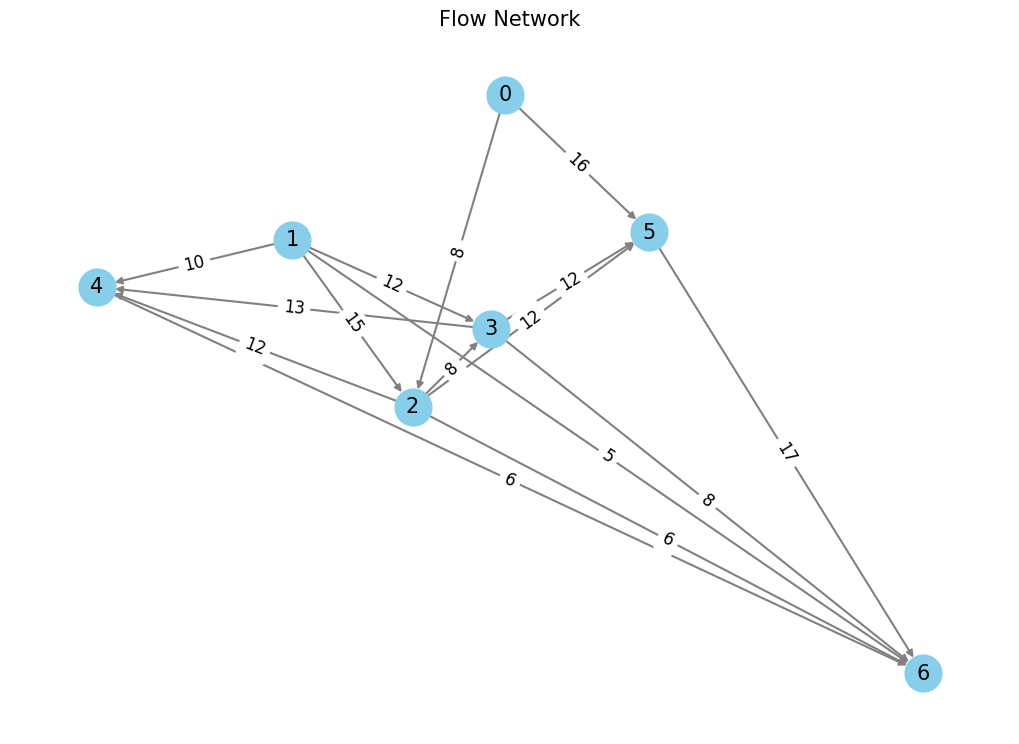

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Generate a random flow network
def generate_random_flow_network(num_vertices):
    graph = Graph(num_vertices)
    capacity_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

    for i in range(num_vertices):
        for j in range(i+1, num_vertices):
            if np.random.rand() < 0.5:  # 50% chance of having an edge between i and j
                capacity = np.random.randint(5, 20)  # random capacity between 5 and 20
                graph.add_edge(i, j, capacity)
                capacity_matrix[i][j] = capacity

    return graph, capacity_matrix

# Visualization
def visualize_flow_network(matrix, source, sink, max_flow=None):
    G = nx.DiGraph()

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j] != 0:
                G.add_edge(i, j, weight=matrix[i][j])

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=15, width=1.5, edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)
    
    if max_flow:
        plt.title(f'Max Flow from {source} to {sink}: {max_flow}', size=15)
    else:
        plt.title('Flow Network', size=15)

    plt.show()

num_vertices = 7
random_graph, capacity_matrix = generate_random_flow_network(num_vertices)
visualize_flow_network(capacity_matrix, 0, num_vertices-1)


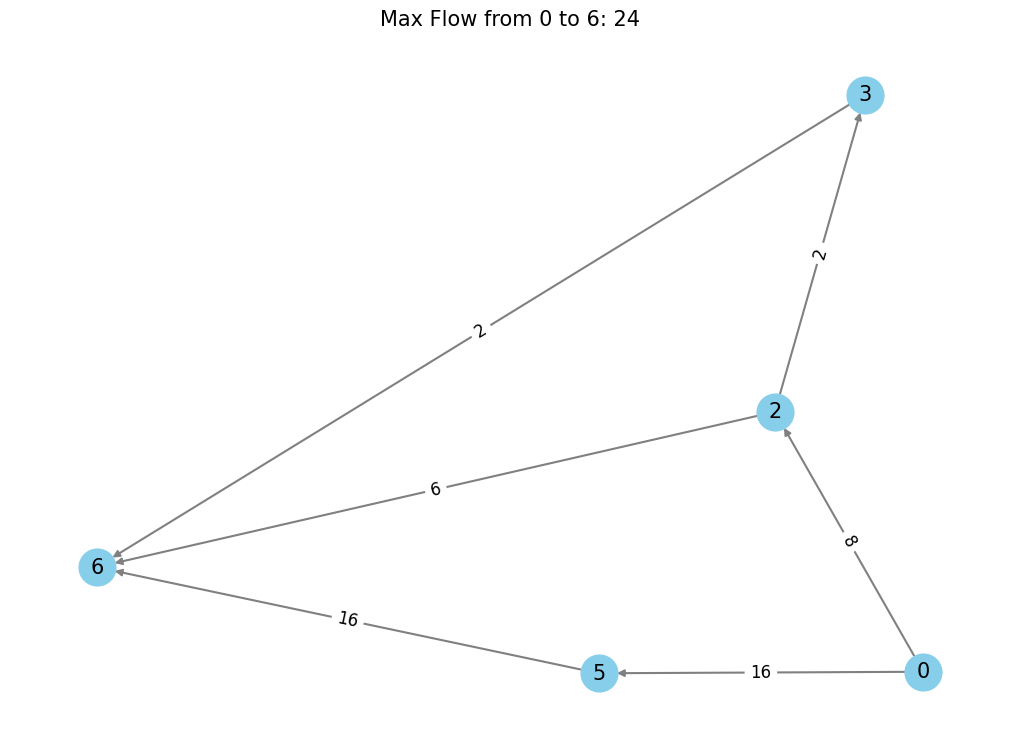

In [11]:
# Apply Ford-Fulkerson algorithm to the random graph
max_flow_random = random_graph.ford_fulkerson(0, num_vertices-1)

# Generate a matrix that represents the resulting flows
flow_matrix = np.zeros((num_vertices, num_vertices), dtype=int)
for i in range(num_vertices):
    for j in range(num_vertices):
        if capacity_matrix[i][j] != 0 and random_graph.graph[i][j] < capacity_matrix[i][j]:
            flow_matrix[i][j] = capacity_matrix[i][j] - random_graph.graph[i][j]

visualize_flow_network(flow_matrix, 0, num_vertices-1, max_flow=max_flow_random)
